## Jupyter notebook to describe the Assignment for the Programming in Data Analysis subject

A) Overall purpose of the package: Random values to create a BitGenerator by Generators
ref: numpy.org->BitGenerators: (https://numpy.org/doc/stable/reference/random/bit_generators/index.html)
ref : machinelearningmastery.com (https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

In [93]:
from numpy.random import PCG64, SeedSequence, seed, Generator, MT19937, default_rng


bg = PCG64(12345678903141592653589793)

# Get the user's seed somehow, maybe through `argparse`.
# If the user did not provide a seed, it should return `None`.

#seed = get_user_seed()


print('Seed = ', seed())# no seed given, so output should be none   
ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(2))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

## Generator method uses PCG 

rg = Generator(bg)
mt = Generator(PCG64())

# In case we want to generate several random values using PCG64

rg = [Generator(PCG64(s)) for s in ss.spawn(10)] #Generate 10 entropy values ussing the last ss seed defined above

print('Using and modifying Spawn value')
print('Length of the entropy values created with ss seed defined:', len(rg))

# if we the spawn number is changed to 8, we are going to create 8 entorpy values instead:

rg = [Generator(PCG64(s)) for s in ss.spawn(8)]

print('Length of the entropy values created with ss seed defined:', len(rg))

Seed =  None
seed = 664775469686501573823092141877763553
seed = 311281035121636079040356359197868919602
seed = 162066322878575665972183804672667160745
Using and modifying Spawn value
Length of the entropy values created with ss seed defined: 10
Length of the entropy values created with ss seed defined: 8


## A.1) Comparation the old method default_rng with new Generator mehtod, by analysing with plots and absolute statistics


#### references: 
[3] matplotlib.pyplot.hist (https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html)

[4] matplotlib.pyplot.scatter(https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html)

default_rng 10 first list numbers:  [0.26667012781624555, 0.8181320821778112, 0.3474838912738445, 0.11799316555137573, 0.4916381394907109, 0.742119211252613, 0.9202121877803019, 0.5338023023173608, 0.04628677208770238, 0.7844516507165481]
Generator list 10 first list numbers:  [0.7782805928761107, 0.7082645901303108, 0.6506783659481841, 0.01935094544437621, 0.2884611802642577, 0.6880664246674303, 0.31334546270482144, 0.2479554095829617, 0.2960720757595695, 0.6947871469619121]
______________________________________________________________
-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods
-DEFAULT_RNG
Maximum value of default_rng method:  0.9993278236766858
Mean value of default_rng method:  0.5090665701070927
-Generator:
Maximum value of Generator method:  0.9991720033449235
Mean value of Generator method:  0.4909036592490006


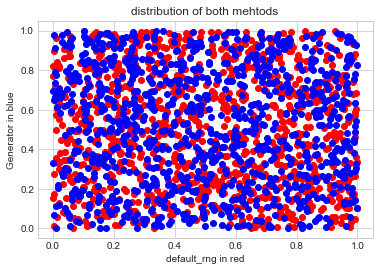

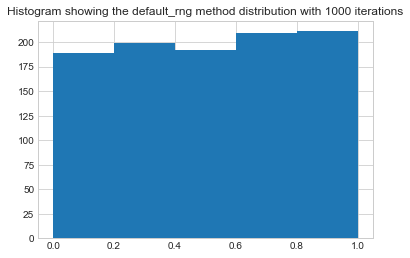

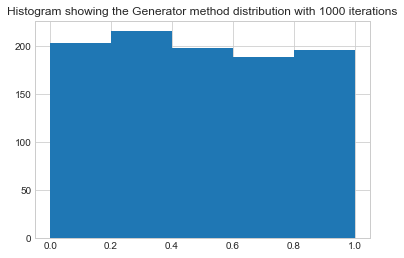

In [95]:
import matplotlib.pyplot as plt
import numpy as np

## Generate 1000 random numbers per method
ls = [default_rng(s).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('default_rng 10 first list numbers: ',[ls[i] for i in range(0,10)])

ls2 = [Generator(PCG64(s)).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('Generator list 10 first list numbers: ',[ls2[i] for i in range(0,10)])




x = ls #np.random.rand(N)
y = ls2 #np.random.rand(N)

plt.scatter(x, y, color='r')
plt.scatter(y, x, color='b')
print('______________________________________________________________')
print('-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods')
print('-DEFAULT_RNG')
print('Maximum value of default_rng method: ',max(x))
print('Mean value of default_rng method: ',np.mean(x))
print('-Generator:')
print('Maximum value of Generator method: ',max(y))
print('Mean value of Generator method: ',np.mean(y))

plt.xlabel('default_rng in red')
plt.ylabel('Generator in blue');
plt.title('distribution of both mehtods')
plt.show()

a = np.array(x) 
plt.hist(a, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the default_rng method distribution with 1000 iterations") 
plt.show()

b = np.array(y) 
plt.hist(b, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the Generator method distribution with 1000 iterations") 
plt.show()

## B) Explanation of simple random data and permutations

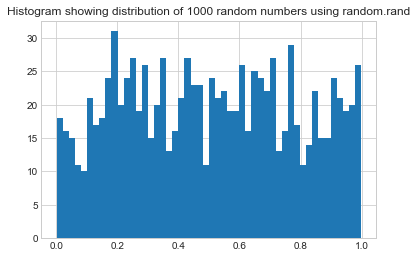

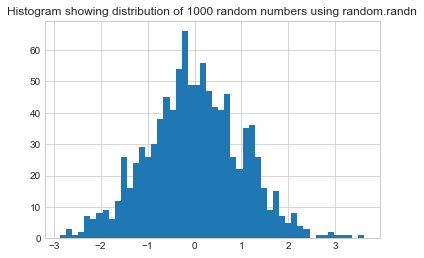

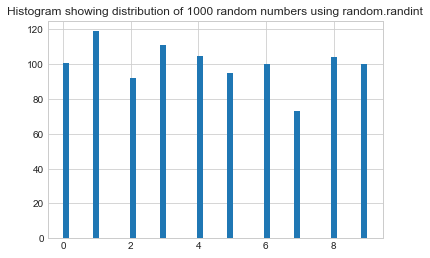

In [114]:
# numpy.random.rand()

a = np.array(np.random.rand(1000))

plt.hist(a, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.rand") 
plt.show()

# np.random.randn()

b = np.array(np.random.randn(1000)) 
#print(max(b))
#print(min(b))
#print(b)
plt.hist(b, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randn") 
plt.show()

# numpy.random.randint()
c = np.array(np.random.randint(0,10, size=1000))

plt.hist(c, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randint") 
plt.show()